In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmldas/nse-top-100-stocks")

print("Path to dataset files:", path)

100%|██████████| 20.4M/20.4M [00:02<00:00, 9.46MB/s]

Extracting files...


Path to dataset files: /home/abhishek/.cache/kagglehub/datasets/kmldas/nse-top-100-stocks/versions/1


In [2]:
pip install kagglehub

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Combining the stock data

import pandas as pd  # for dataframe
import os   #OS library operating system ke saath interact karne ke liye use hoti hai, jaise file path banane ke liye.
import glob # Glob library file paths ko dhoondhne ke liye use hoti hai jo ek specific pattern se match karti hain.


In [ ]:
path = r'/home/abhishek/.cache/kagglehub/datasets/kmldas/nse-top-100-stocks/versions/1'


# path setup kiya hai yaha mene 

In [9]:
#  Glob ka use karke uss folder ke andar ki saari .xlsx files ke naam dhoondhna.
# os.path.join(path, "*.xlsx") ek proper file path banata hai


all_files = glob.glob(os.path.join(path , "*.xlsx"))

In [10]:
# Made a empty list where we will store the data of each file 
li = []

In [ ]:
# Ek loop chala rahe hai  jo 'all_files' list mein se ek-ek karke har file ke naam (filename) ko lega.

for filename in all_files:
    df = pd.read_excel(filename , index_col=None , header=0)
    li.append(df)

# yaha pe index = None liya hai matlab iss file k pheele columns ko index nahi banana hai
# header = 0 ka matlab hai ki file ki peheli row column names (headers) hai
# li.append ka use yaha pe kiya gyaa hai ki padne k baad uss dataframe (df) ko hamari (li) mei daal dena

In [ ]:
pip install openpyxl   # pandas ki excel file ko padne k liye ye library ka use kiya gaya hai 

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# loop poora hone k baad 'li' list mein saara DataFrames honge
# pd.concat() function ka use karke unn saare DataFrames ko ek ke neeche ek jodna.
# axis=0 ka matlab hai ki DataFrames ko vertically (rows ke neeche rows) jodna hai.
# ignore_index=True ka matlab hai ki puraane index ko bhool jao aur naya index 0 se shuru karo.



frame = pd.concat(li , axis = 0 , ignore_index= True )


In [18]:
frame.to_csv('all_stocks.csv', index=False)


print("Successfully made a file named all_stocks.csv.")


Successfully made a file named all_stocks.csv.


In [19]:
df = pd.read_csv('all_stocks.csv')

In [20]:
print(df.head(10))

         Date      Symbol Series  Prev Close   Open   High     Low    Last  \
0  2010-01-08  ABBOTINDIA     EQ      783.75  755.0  807.0  755.00  807.00   
1  2010-01-11  ABBOTINDIA     EQ      807.00  825.0  825.0  790.00  804.80   
2  2010-01-12  ABBOTINDIA     EQ      804.80  800.0  805.0  790.00  790.00   
3  2010-01-13  ABBOTINDIA     EQ      790.00  787.0  787.0  720.00  767.00   
4  2010-01-14  ABBOTINDIA     EQ      767.00  769.0  798.0  769.00  785.10   
5  2010-01-15  ABBOTINDIA     EQ      785.10  768.5  805.0  768.50  798.70   
6  2010-01-18  ABBOTINDIA     EQ      797.05  808.0  808.0  791.00  800.00   
7  2010-01-19  ABBOTINDIA     EQ      799.55  804.0  805.0  791.50  791.50   
8  2010-01-20  ABBOTINDIA     EQ      792.40  800.9  800.9  783.25  787.55   
9  2010-01-21  ABBOTINDIA     EQ      786.45  751.0  800.0  751.00  784.00   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  807.00  784.12    51.0  3.998995e+09     NaN                50.0   

# Data cleaning and Stock Selection 

In [22]:
# Step : 1 Stock Filter + Data Sorting 


import pandas as pd
from pathlib import Path

In [24]:
CSV_PATH = "/home/abhishek/Desktop/NSE_top_100/NSE_Top_100/all_stocks.csv"
CHOSEN_SYMBOL = "ABBOTINDIA"   # Targeted stock 
OUT_DIR = "./"


In [25]:
df = pd.read_csv('all_stocks.csv')

In [26]:
# 2) Quick check: kitni rows/cols hain (sirf info ke liye)
print("Dataset shape:", df.shape)

Dataset shape: (252905, 15)


In [27]:
# 3) 'Symbol' missing wali rows hatao (stock filter ke liye zaroori)
df = df.dropna(subset=["Symbol"]).copy()


In [ ]:
df['Symbol'].isnull().sum()

# its visible here that no null value is their 

np.int64(0)

In [29]:
# 4) 'Date' ko datetime me convert karo
#    - errors='coerce' invalid dates ko NaT banayega (error nahi aayega)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [30]:
df['Date'].dtype

dtype('<M8[ns]')

In [31]:
df["Date"].isnull().sum()

np.int64(0)

In [32]:
# 5) Jin rows me Date parse nahi hui (NaT), unhe drop karo
df = df.dropna(subset=["Date"])

In [33]:
df["Date"].isnull().sum()

np.int64(0)

In [35]:
# Agar CHOSEN_SYMBOL dataset me nahi hai, to top-available symbol choose kar lo
if CHOSEN_SYMBOL not in df["Symbol"].unique():
    print(f"Warning: '{CHOSEN_SYMBOL}' not found. Falling back to most frequent symbol.")
    # value_counts se sabse zyada rows wala symbol choose karte hain
    CHOSEN_SYMBOL = df["Symbol"].value_counts().index[0]

In [36]:
print("Working with symbol:", CHOSEN_SYMBOL)

Working with symbol: ABBOTINDIA


In [37]:
# 7) Sirf chosen symbol ka data lo (continuous time-series banane ke liye)
stock_df = df[df["Symbol"] == CHOSEN_SYMBOL].copy()


In [38]:
# 8) Date ke hisaab se sort (oldest -> newest)
stock_df = stock_df.sort_values("Date").reset_index(drop=True)

In [ ]:
# 9) Sanity print: date range aur total rows
print(f"Date range for {CHOSEN_SYMBOL}: {stock_df['Date'].min().date()} -> {stock_df['Date'].max().date()}")
print(f"Total rows for {CHOSEN_SYMBOL}: {len(stock_df)}")



#  sabse purana date se sabse naya date tak ka range aur total rows count print kar rahi hai — taaki confirm ho jaye data sahi sort hua hai aur pura mil gaya.

Date range for ABBOTINDIA: 2010-01-08 -> 2020-10-01
Total rows for ABBOTINDIA: 2667


In [40]:
print(stock_df.head())

        Date      Symbol Series  Prev Close   Open   High    Low   Last  \
0 2010-01-08  ABBOTINDIA     EQ      783.75  755.0  807.0  755.0  807.0   
1 2010-01-11  ABBOTINDIA     EQ      807.00  825.0  825.0  790.0  804.8   
2 2010-01-12  ABBOTINDIA     EQ      804.80  800.0  805.0  790.0  790.0   
3 2010-01-13  ABBOTINDIA     EQ      790.00  787.0  787.0  720.0  767.0   
4 2010-01-14  ABBOTINDIA     EQ      767.00  769.0  798.0  769.0  785.1   

   Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  807.0  784.12    51.0  3.998995e+09     NaN                50.0   
1  804.8  793.90   897.0  7.121265e+10     NaN               697.0   
2  790.0  799.36   426.0  3.405260e+10     NaN               401.0   
3  767.0  758.53   359.0  2.723129e+10     NaN               164.0   
4  785.1  791.73   317.0  2.509785e+10     NaN               122.0   

   %Deliverble  
0       0.9804  
1       0.7770  
2       0.9413  
3       0.4568  
4       0.3849  


In [41]:
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)
out_path = Path(OUT_DIR) / f"{CHOSEN_SYMBOL}_step1_sorted.csv"
stock_df.to_csv(out_path, index=False)
print("Saved:", out_path)

Saved: ABBOTINDIA_step1_sorted.csv


# Feature Selection & Handing Missing Values & Train-Test Splitting 


In [48]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path

In [47]:
pip install scikit-learn


  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 9.4 MB/s eta 0:00:00:00:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [50]:
stock_df = pd.read_csv("ABBOTINDIA_step1_sorted.csv", parse_dates=["Date"])


In [51]:
FEATURES =  ["Open", "High", "Low", "Close", "Volume", "VWAP"]

In [52]:
# 2) Sirf Date + selected features lo
df2 = stock_df[["Date"] + FEATURES].copy()

In [53]:
import pandas as pd

df = pd.read_csv("ABBOTINDIA_step1_sorted.csv")
FEATURES = ["Open", "High", "Low", "Close", "Volume", "VWAP"]

for col in FEATURES:
    # non-numeric count
    non_num_count = pd.to_numeric(df[col], errors="coerce").isna().sum() - df[col].isna().sum()
    print(f"{col}: {non_num_count} non-numeric values")


Open: 0 non-numeric values
High: 0 non-numeric values
Low: 0 non-numeric values
Close: 0 non-numeric values
Volume: 0 non-numeric values
VWAP: 0 non-numeric values


In [56]:
df2[FEATURES] = df2[FEATURES].apply(pd.to_numeric, errors="coerce")
df2[FEATURES] = df2[FEATURES].ffill().bfill()

In [58]:
df = df.sort_values("Date")
agg = {"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","VWAP":"mean"}  # (ya VWAP ko volume-weighted karo agar intraday volume ho)
df = df.groupby("Date", as_index=False).agg(agg)
print("Dup dates after agg:", df["Date"].duplicated().sum())


Dup dates after agg: 0


In [63]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


2025-08-10 19:04:29.300082: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-10 19:04:30.235897: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-10 19:04:30.669387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754832871.163863   11689 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754832871.288239   11689 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754832871.954601   11689 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [60]:
pip install matplotlib

  Using cached matplotlib-3.10.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (107 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp312-cp

In [62]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.5-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached grpcio-1.74.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metada

In [64]:
PATH = "ABBOTINDIA_step1_sorted.csv"       # Step-1 output
df = pd.read_csv(PATH, parse_dates=["Date"]).sort_values("Date").reset_index(drop=True)


In [71]:
# Target = next-day Close (1-day ahead forecasting)
df2["Target"] = df2["Close"].shift(-1)
df2 = df2.dropna().reset_index(drop=True)

In [72]:
# 2) Train/Test split by date (future simulation)
#    Train: 2010–2018, Test: 2019–2020
# ----------------------------
SPLIT_DATE = pd.Timestamp("2019-01-01")
train_df = df2[df2["Date"] < SPLIT_DATE].copy()
test_df  = df2[df2["Date"] >= SPLIT_DATE].copy()

print("Train rows:", len(train_df), "| Test rows:", len(test_df))

Train rows: 2229 | Test rows: 434


In [73]:
# 3) Scale features/target (fit on TRAIN only!)
# ----------------------------
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train = train_df[FEATURES].values
y_train = train_df[["Target"]].values
X_test  = test_df[FEATURES].values
y_test  = test_df[["Target"]].values

X_train_s = x_scaler.fit_transform(X_train)
X_test_s  = x_scaler.transform(X_test)
y_train_s = y_scaler.fit_transform(y_train)
y_test_s  = y_scaler.transform(y_test)


In [74]:
# ----------------------------
# 4) Make sequences (windowed samples)
#    Each sample = last W days (features) → predict next-day Target
# ----------------------------
def make_sequences(X, y, window=60):
    Xs, ys = [], []
    for i in range(window, len(X)):
        Xs.append(X[i-window:i, :])  # past W rows
        ys.append(y[i, 0])           # the target at i (next day for that window)
    return np.array(Xs), np.array(ys)

WINDOW = 60
Xtr_seq, ytr_seq = make_sequences(X_train_s, y_train_s, window=WINDOW)
Xte_seq, yte_seq = make_sequences(X_test_s,  y_test_s,  window=WINDOW)

print("Xtr_seq:", Xtr_seq.shape, "| Xte_seq:", Xte_seq.shape)


Xtr_seq: (2169, 60, 6) | Xte_seq: (374, 60, 6)


# MOdel Building 

In [75]:
# ----------------------------
# 5) Build models
# ----------------------------
def build_lstm(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mse")
    return model

def build_gru(input_shape):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(32),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mse")
    return model

input_shape = (Xtr_seq.shape[1], Xtr_seq.shape[2])
lstm = build_lstm(input_shape)
gru  = build_gru(input_shape)

early = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# ----------------------------

2025-08-10 19:18:07.097131: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/abhishek/anaconda3/envs/pyspark_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
# 6) Train
# ----------------------------
history_lstm = lstm.fit(
    Xtr_seq, ytr_seq, 
    validation_split=0.1, 
    epochs=100, batch_size=32, 
    callbacks=[early],
    verbose=1
)

history_gru = gru.fit(
    Xtr_seq, ytr_seq, 
    validation_split=0.1, 
    epochs=100, batch_size=32, 
    callbacks=[early],
    verbose=1
)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0077 - val_loss: 0.0053
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.7430e-04 - val_loss: 0.0074
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.1764e-04 - val_loss: 0.0092
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.5114e-04 - val_loss: 0.0075
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.1279e-04 - val_loss: 0.0071
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 3.9561e-04 - val_loss: 0.0092
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.9955e-04 - val_loss: 0.0048
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 3.5013e-04 - val_loss: 0.0050
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.7476e-04 - val_loss: 0.0038
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.6089e-04 - val_loss: 0.0071
Epoch 11/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.4061e-04 - val_loss: 0.0047
Epoch 12/100

In [78]:
# 7) Predict (on TEST) and inverse-scale to original prices
# ----------------------------
pred_lstm_s = lstm.predict(Xte_seq)
pred_gru_s  = gru.predict(Xte_seq)

# Inverse scale
pred_lstm = y_scaler.inverse_transform(pred_lstm_s.reshape(-1,1)).ravel()
pred_gru  = y_scaler.inverse_transform(pred_gru_s.reshape(-1,1)).ravel()
y_true    = y_scaler.inverse_transform(yte_seq.reshape(-1,1)).ravel()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [80]:
# 8) Metrics
#    - RMSE/MAE/R2 (standard)
#    - MAPE% (avg percent error), Accuracy% ≈ 100 - MAPE%
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def metrics(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)                 # <- squared kwarg ki jagah
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-8, None))) * 100.0
    acc  = 100.0 - mape
    return rmse, mae, r2, mape, acc

rmse_l, mae_l, r2_l, mape_l, acc_l = metrics(y_true, pred_lstm)
rmse_g, mae_g, r2_g, mape_g, acc_g = metrics(y_true, pred_gru)

print("\n==== LSTM Performance ====")
print(f"RMSE: {rmse_l:.3f} | MAE: {mae_l:.3f} | R2: {r2_l:.3f} | MAPE: {mape_l:.2f}% | Accuracy≈ {acc_l:.2f}%")

print("\n==== GRU Performance ====")
print(f"RMSE: {rmse_g:.3f} | MAE: {mae_g:.3f} | R2: {r2_g:.3f} | MAPE: {mape_g:.2f}% | Accuracy≈ {acc_g:.2f}%")



==== LSTM Performance ====
RMSE: 3606.063 | MAE: 3061.632 | R2: -0.115 | MAPE: 21.52% | Accuracy≈ 78.48%

==== GRU Performance ====
RMSE: 2012.234 | MAE: 1640.207 | R2: 0.653 | MAPE: 11.33% | Accuracy≈ 88.67%


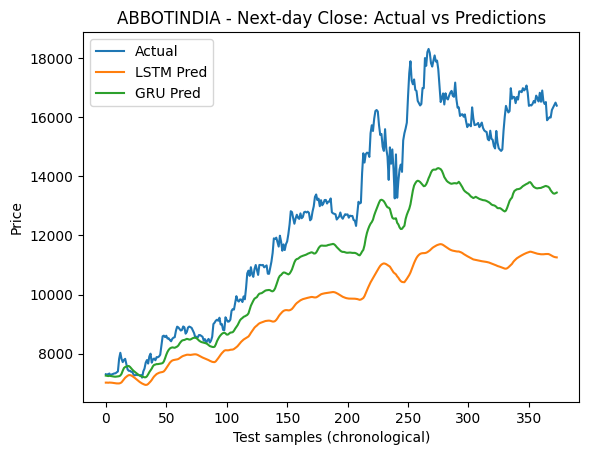

In [81]:
plt.figure()
plt.plot(y_true, label="Actual")
plt.plot(pred_lstm, label="LSTM Pred")
plt.plot(pred_gru, label="GRU Pred")
plt.title("ABBOTINDIA - Next-day Close: Actual vs Predictions")
plt.xlabel("Test samples (chronological)")
plt.ylabel("Price")
plt.legend()
plt.show()